In [3]:

!pip install yfinance

import yfinance as yf

tesla_data = yf.download("TSLA", start="2023-01-01", end="2023-12-31")
print(tesla_data.head())


[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  118.470001  118.800003  104.639999  108.099998  108.099998   
2023-01-04  109.110001  114.589996  107.519997  113.639999  113.639999   
2023-01-05  110.510002  111.750000  107.160004  110.339996  110.339996   
2023-01-06  103.000000  114.389999  101.809998  113.059998  113.059998   
2023-01-09  118.959999  123.519997  117.110001  119.769997  119.769997   

               Volume  
Date                   
2023-01-03  231402800  
2023-01-04  180389000  
2023-01-05  157986300  
2023-01-06  220911100  
2023-01-09  190284000  


In [4]:

print(tesla_data.tail())


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-12-22  256.760010  258.220001  251.369995  252.539993  252.539993   
2023-12-26  254.490005  257.970001  252.910004  256.609985  256.609985   
2023-12-27  258.350006  263.339996  257.519989  261.440002  261.440002   
2023-12-28  263.660004  265.130005  252.710007  253.179993  253.179993   
2023-12-29  255.100006  255.190002  247.429993  248.479996  248.479996   

               Volume  
Date                   
2023-12-22   93249800  
2023-12-26   86892400  
2023-12-27  106494400  
2023-12-28  113619900  
2023-12-29  100615300  


In [5]:

tesla_data = tesla_data.reset_index()
tesla_data.to_csv('tesla_data.csv')
print(tesla_data.head())


        Date        Open        High         Low       Close   Adj Close  \
0 2023-01-03  118.470001  118.800003  104.639999  108.099998  108.099998   
1 2023-01-04  109.110001  114.589996  107.519997  113.639999  113.639999   
2 2023-01-05  110.510002  111.750000  107.160004  110.339996  110.339996   
3 2023-01-06  103.000000  114.389999  101.809998  113.059998  113.059998   
4 2023-01-09  118.959999  123.519997  117.110001  119.769997  119.769997   

      Volume  
0  231402800  
1  180389000  
2  157986300  
3  220911100  
4  190284000  


In [6]:

import yfinance as yf

gme_data = yf.download("GME", start="2023-01-01", end="2023-12-31")
print(gme_data.head())

print(gme_data.tail())

gme_data = gme_data.reset_index()
gme_data.to_csv('gme_data.csv')
print(gme_data.head())


[*********************100%***********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2023-01-03  18.639999  19.260000  17.090000  17.200001  17.200001  5135200
2023-01-04  17.250000  17.930000  16.900000  17.320000  17.320000  3939300
2023-01-05  17.059999  17.260000  15.890000  16.219999  16.219999  6066200
2023-01-06  16.000000  16.570000  15.410000  16.459999  16.459999  4823400
2023-01-09  16.650000  17.129999  16.360001  16.379999  16.379999  3522600
                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2023-12-22  16.780001  17.200001  16.450001  16.969999  16.969999  3325100
2023-12-26  16.980000  17.410000  16.820000  17.360001  17.360001  3079600
2023-12-27  17.430000  18.370001  17.370001  18.370001  18.370001  4800100
2023-12-28  18.049999  18.320000  17.850000  18.070000  18.070000  3574800
2023-12-29  18.040001  18

In [16]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Fetch the webpage
url = 'https://stockanalysis.com/stocks/gme/financials/'
response = requests.get(url)

# Check if the response is successful
if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    table = soup.find('table')  # Find the table containing revenue data

    # Parse the table into a dataframe
    df = pd.read_html(str(table))[0]

    # Display the last five rows
    print(df.tail())
else:
    print(f'Failed to retrieve content: {response.status_code}')


             Fiscal Year                 TTM             FY 2024  \
           Period Ending Aug '24 Aug 3, 2024 Feb '24 Feb 3, 2024   
37        D&A For EBITDA                44.3                56.2   
38                  EBIT                 2.9               -31.7   
39           EBIT Margin               0.06%              -0.60%   
40    Effective Tax Rate              12.37%              48.85%   
41  Advertising Expenses                   -                39.3   

                FY 2023              FY 2022              FY 2021  \
   Jan '23 Jan 28, 2023 Jan '22 Jan 29, 2022 Jan '21 Jan 30, 2021   
37                 61.7                 77.2                 80.7   
38               -363.5               -380.4               -260.8   
39               -6.13%               -6.33%               -5.12%   
40                    -                    -                    -   
41                   75                 93.6                 58.4   

               FY 2020 2019 - 2015  
  

<ipython-input-16-c138bff7187d>:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


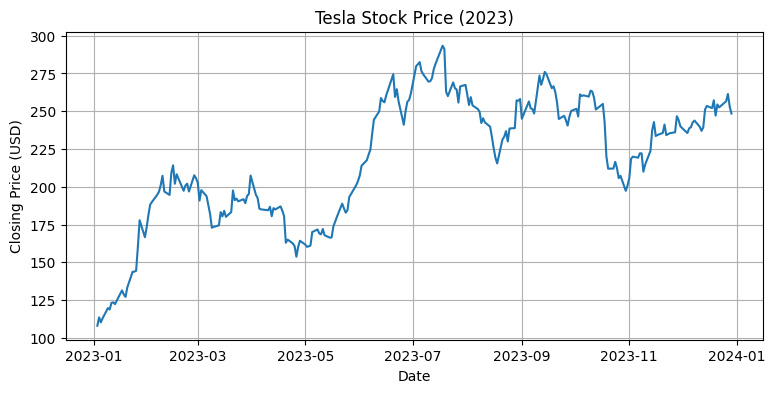

In [18]:

import matplotlib.pyplot as plt

def make_graph(data, title):
  plt.figure(figsize=(9, 4))
  plt.plot(data['Date'], data['Close'])
  plt.xlabel('Date')
  plt.ylabel('Closing Price (USD)')
  plt.title(title)
  plt.grid(True)
  plt.show()


make_graph(tesla_data, "Tesla Stock Price (2023)")


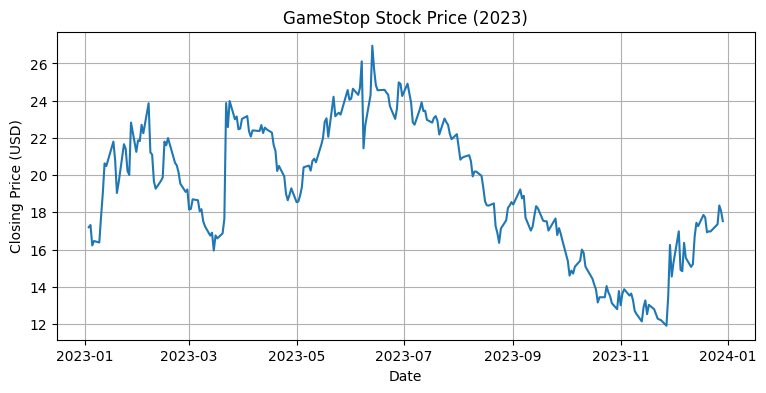

In [19]:

make_graph(gme_data, "GameStop Stock Price (2023)")
